In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
path='C:\\Users\\amanc\\Desktop\\python new project\\Machine Learning\\Credit Score Classification\\data\\train.csv'
# dtype={'Age':'int64',
#        'Annual_Income':'float64', 'Monthly_Inhand_Salary':'float64', 'Num_Bank_Accounts':'int64',
#        'Num_Credit_Card':'int64', 'Interest_Rate':'float64', 'Num_of_Loan':'int64',
#        'Delay_from_due_date':'int64', 'Num_of_Delayed_Payment':'int64', 'Changed_Credit_Limit':'float64',
#        'Num_Credit_Inquiries':'int64', 'Outstanding_Debt':'float64',
#        'Credit_Utilization_Ratio':'float64',
#        'Payment_of_Min_Amount':'category', 'Total_EMI_per_month':'float64',
#        'Amount_invested_monthly':'float64', 'Monthly_Balance':'float64'
#        }
data=pd.read_csv(path, low_memory=False)


In [12]:
data.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [13]:
data.shape

(100000, 28)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [15]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [16]:
data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [17]:
data['Customer_ID'].duplicated().sum()
#shows that one person has multiple data 

87500

In [18]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [19]:
data.tail(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.6736955618808,Poor


In [20]:
# age1=data['Age'].unique()
# for i in age1:
#     print(i)

In [21]:
data['Age']=data['Age'].str.replace('_','')
data['Age']=data['Age'].str.replace('-','')
data['Age'] = [int(x) for x in data['Age']]


In [22]:
data['Age'].dtype

dtype('int64')

In [23]:
# for index in range(len(data)):
    #     current_customer_id = data.loc[index, 'Customer_ID']
        
    #     # Initialize next and previous customer IDs
    #     next_customer_id = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
    #     previous_customer_id = data.loc[index - 1, 'Customer_ID'] if index > 0 else None
        
    #     # First check
    #     if data.loc[index, 'Age'] > 56:
    #         if previous_customer_id is not None and current_customer_id == previous_customer_id:
    #             data.loc[index, 'Age'] = data.loc[index - 1, 'Age']
    #         elif next_customer_id is not None and current_customer_id == next_customer_id:
    #             data.loc[index, 'Age'] = data.loc[index + 1, 'Age']

    #     # Second check (Reverse Order)
    #     if data.loc[index, 'Age'] > 56:
    #         if next_customer_id is not None and current_customer_id == next_customer_id:
    #             data.loc[index, 'Age'] = data.loc[index + 1, 'Age']
    #         elif previous_customer_id is not None and current_customer_id == previous_customer_id:
    #             data.loc[index, 'Age'] = data.loc[index - 1, 'Age']


In [24]:
def fill_values(column_name, data, threshold):
    for index in range(len(data)):
        current_value = data.loc[index, 'Customer_ID']

        next_value = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
        previous_value = data.loc[index - 1, 'Customer_ID'] if index > 0 else None

        # First check
        if data.loc[index, column_name] > threshold:
            if previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]
            elif next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]

        # Second check (Reverse Order)
        if data.loc[index, column_name] > threshold:
            if next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]
            elif previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]

    return data

In [25]:
def fill_values2(column_name, data, threshold):
    for index in range(len(data)):
        current_value = data.loc[index, 'Customer_ID']

        next_value = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
        previous_value = data.loc[index - 1, 'Customer_ID'] if index > 0 else None

        # First check
        if data.loc[index, column_name] == threshold:
            if previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]
            elif next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]

        # Second check (Reverse Order)
        if data.loc[index, column_name] == threshold:
            if next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]
            elif previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]

    return data

In [26]:
for i in range(2):
    data = fill_values('Age', data, 56)
    

In [27]:
# age2=data['Age'].unique()
# for i in age2:
#     print(i)

In [28]:
data['SSN']=data['SSN'].str.replace('-','')
data['SSN']=data['SSN'].str.replace('#F%$D@*&8','1')  # #F%$D@*&8 is value in SSN which is replace by 1 so that all col. can be converted into integer
data['SSN'] = [int(x) for x in data['SSN']]

In [29]:
for i in range(3):
    for index in range(len(data)):
        current_value = data.loc[index, 'Customer_ID']

        next_value = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
        previous_value = data.loc[index - 1, 'Customer_ID'] if index > 0 else None

        # First check
        if data.loc[index, 'SSN'] == 1:
            if next_value is not None and current_value == next_value:
                data.loc[index, 'SSN'] = data.loc[index + 1, 'SSN']
            elif previous_value is not None and current_value == previous_value:
                data.loc[index, 'SSN'] = data.loc[index - 1, 'SSN']
            

        # Second check (Reverse Order)
        
        if data.loc[index, 'SSN'] == 1:
            if previous_value is not None and current_value == previous_value:
                data.loc[index, 'SSN'] = data.loc[index - 1, 'SSN']
            elif next_value is not None and current_value == next_value:
                data.loc[index, 'SSN'] = data.loc[index + 1, 'SSN']




In [30]:
#data=fill_values2('SSN',data,1)

In [31]:
data[data['SSN']==1]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [32]:
data['Occupation'].unique()


array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [33]:
data['Occupation']=data['Occupation'].str.replace('_______','None')

In [34]:
for i in range(3):
    data = fill_values2('Occupation', data,'None')

In [35]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [36]:

data['Annual_Income']=data['Annual_Income'].str.replace('_','')

data['Annual_Income']=[float(x) for x in data['Annual_Income']]
data['Annual_Income']=data['Annual_Income'].apply(lambda x: f"{x:.2f}")
data['Annual_Income']=[float(x) for x in data['Annual_Income']]

In [37]:
data['Monthly_Inhand_Salary'].isnull().sum()

15002

In [38]:

data['Monthly_Inhand_Salary'].fillna(0,inplace=True)
data['Monthly_Inhand_Salary']=data['Monthly_Inhand_Salary'].apply(lambda x: f"{x:.2f}")
data['Monthly_Inhand_Salary']=[str(x) for x in data['Monthly_Inhand_Salary']] #changing into str because cannot fill values on float datatype

C:\Users\amanc\AppData\Local\Temp\ipykernel_2984\2251128497.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Monthly_Inhand_Salary'].fillna(0,inplace=True)


In [39]:
for i in range(5):
    data=fill_values2('Monthly_Inhand_Salary',data,'0.00')
# for index in range(len(data)):
#     current_value=data.loc[index,'Customer_ID']

#     next_value=data.loc[index+1,'Customer_ID'] if index < len(data)-1 else None
#     previous_value=data.loc[index-1,'Customer_ID'] if index > 0 else None
    
#     # First check
#     if data.loc[index,'Monthly_Inhand_Salary'] == '0.00':

#         if previous_value is not None and current_value == previous_value:
#             data.loc[index,'Monthly_Inhand_Salary'] = data.loc[index-1,'Monthly_Inhand_Salary']
#         elif next_value is not None and current_value == next_value:
#             data.loc[index,'Monthly_Inhand_Salary'] = data.loc[index+1,'Monthly_Inhand_Salary']
        
    
#     # Second check (Reverse Order)
#     if data.loc[index,'Monthly_Inhand_Salary']== '0.00':
#         if next_value is not None and current_value == next_value:
#             data.loc[index,'Monthly_Inhand_Salary'] = data.loc[index+1,'Monthly_Inhand_Salary']
#         elif previous_value is not None and current_value == previous_value:
#             data.loc[index,'Monthly_Inhand_Salary'] = data.loc[index-1,'Monthly_Inhand_Salary']
        
        

In [40]:
data['Monthly_Inhand_Salary']=[float(x) for x in data['Monthly_Inhand_Salary']] 

In [41]:
data[data['Monthly_Inhand_Salary']=='0.00']
   #


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [42]:
#data.to_csv('output.csv')


In [43]:
# data['Num_Bank_Accounts'].unique()

In [44]:
data['Num_Bank_Accounts']=data['Num_Bank_Accounts'].replace(-1,20)

In [45]:
for i in range(2):
    for index in range(len(data)):
        current_value=data.loc[index,'Customer_ID']

        next_value=data.loc[index+1,'Customer_ID'] if index < len(data)-1 else None
        previous_value=data.loc[index-1,'Customer_ID'] if index > 0 else None
        
        # First check

        if data.loc[index,'Num_Bank_Accounts']>10:
                if next_value is not None and current_value == next_value:
                    data.loc[index,'Num_Bank_Accounts'] = data.loc[index+1,'Num_Bank_Accounts']
                elif previous_value is not None and current_value == previous_value:
                    data.loc[index,'Num_Bank_Accounts'] = data.loc[index-1,'Num_Bank_Accounts']
        
        # Second check (Reverse Order)
        if data.loc[index,'Num_Bank_Accounts'] > 10:
            if previous_value is not None and current_value == previous_value:
                data.loc[index,'Num_Bank_Accounts'] = data.loc[index-1,'Num_Bank_Accounts']
            elif next_value is not None and current_value == next_value:
                data.loc[index,'Num_Bank_Accounts'] = data.loc[index+1,'Num_Bank_Accounts']
        
        

In [46]:
data['Num_Bank_Accounts'].unique()

array([ 3,  2,  1,  7,  4,  0,  8,  5,  6,  9, 10], dtype=int64)

<Axes: ylabel='count'>

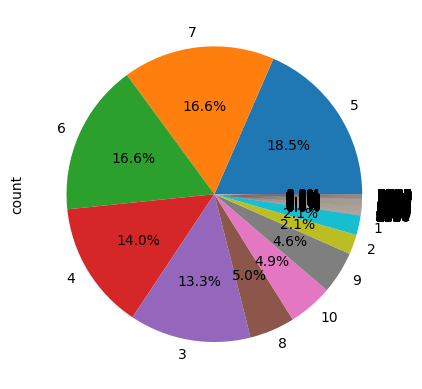

In [47]:
data['Num_Credit_Card'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [48]:
# card=data['Num_Credit_Card'].unique()
# for i in np.sort(card):
# #     print(i)
# for index,value in enumerate(data['Num_Credit_Card'].value_counts()):
#     print(index,value)

In [49]:
for i in range(2):
    data = fill_values('Num_Credit_Card', data, 9)


In [50]:
# for i in range(2):
#     for index in range(len(data)):
#         current_value=data.loc[index,'Customer_ID']

#         next_value=data.loc[index+1,'Customer_ID'] if index < len(data)-1 else None
#         previous_value=data.loc[index-1,'Customer_ID'] if index > 0 else None
        
#         # First check
#         if data.loc[index,'Num_Credit_Card'] > 10:
#             if previous_value is not None and current_value == previous_value:
#                 data.loc[index,'Num_Credit_Card'] = data.loc[index-1,'Num_Credit_Card']
#             elif next_value is not None and current_value == next_value:
#                 data.loc[index,'Num_Credit_Card'] = data.loc[index+1,'Num_Credit_Card']
        
#         # Second check (Reverse Order)
#         if data.loc[index,'Num_Credit_Card']>10:
#                 if next_value is not None and current_value == next_value:
#                     data.loc[index,'Num_Credit_Card'] = data.loc[index+1,'Num_Credit_Card']
#                 elif previous_value is not None and current_value == previous_value:
#                     data.loc[index,'Num_Credit_Card'] = data.loc[index-1,'Num_Credit_Card']

In [51]:
# a=data['Interest_Rate'].unique()
# for i in np.sort(a):
#     print(i)

In [52]:
for i in range(6):
    data=fill_values('Interest_Rate',data,34)


In [53]:
data[data['Interest_Rate']>34]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [54]:
data['Num_of_Loan']=data['Num_of_Loan'].str.replace('-','') #data contain -100 and 0_ or _2
data['Num_of_Loan']=data['Num_of_Loan'].str.replace('_','')
data['Num_of_Loan']=[int(x) for x in data['Num_of_Loan']] #converting into integer

In [55]:
data['Num_of_Loan'].sample(10)

15087      7
11620      8
91246      5
79094      8
87019    100
58970      2
21128      0
69535      0
1092       3
35648      2
Name: Num_of_Loan, dtype: int64

In [56]:
for i in range(3):
    data=fill_values('Num_of_Loan',data,9)

In [57]:
data[data['Num_of_Loan']>9]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [58]:
data['Type_of_Loan'].isna().sum()

11408

In [59]:
for index in range(len(data)):
    if data.loc[index,'Num_of_Loan']==0:
        data.loc[index,'Type_of_Loan']='No Loan'



In [60]:
data['Delay_from_due_date'].unique() #contain -ve values let's fill it w.r.t. customer id

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

In [61]:
for i in range(8):
    for index in range(len(data)):
        current_value=data.loc[index,'Customer_ID']

        next_value=data.loc[index+1,'Customer_ID'] if index < len(data)-1 else None
        previous_value=data.loc[index-1,'Customer_ID'] if index > 0 else None
            
        # First check
        if data.loc[index,'Delay_from_due_date'] <0 or data.loc[index,'Delay_from_due_date'] >24:
            if previous_value is not None and current_value == previous_value:
                data.loc[index,'Delay_from_due_date'] = data.loc[index-1,'Delay_from_due_date']
            elif next_value is not None and current_value == next_value:
                data.loc[index,'Delay_from_due_date'] = data.loc[index+1,'Delay_from_due_date']
            
        # Second check (Reverse Order)
        if data.loc[index,'Delay_from_due_date']<0 or data.loc[index,'Delay_from_due_date'] >24:
                if next_value is not None and current_value == next_value:
                    data.loc[index,'Delay_from_due_date'] = data.loc[index+1,'Delay_from_due_date']
                elif previous_value is not None and current_value == previous_value:
                    data.loc[index,'Delay_from_due_date'] = data.loc[index-1,'Delay_from_due_date']

In [62]:
data['Delay_from_due_date'].unique()

array([ 3,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 14,  2, 16,
       17, 15, 23, 22, 21, 18, 19, 53, 26, 48, 20, 24, 52, 25, 61, 31, 28,
       49, 27, 57, 62, 54, 50, 41, 55, 36, 46, 60, 33, 29, 44, 34, 38, 45,
       56, 42, 47, 59, 40, 35, 32, 51, 39, 37, 43, 64, 58, 65, 67, 63, 66],
      dtype=int64)

In [63]:
data['Num_of_Delayed_Payment'].isnull().sum()

7002

In [64]:
data['Num_of_Delayed_Payment']=data['Num_of_Delayed_Payment'].str.replace('_','')
data['Num_of_Delayed_Payment']=data['Num_of_Delayed_Payment'].ffill()
data['Num_of_Delayed_Payment']=[int(i)for i in data['Num_of_Delayed_Payment']]

In [65]:
# for i in np.sort(data['Num_of_Delayed_Payment'].unique()):
#     print(i)

In [66]:
for index in range(len(data)):
    if data.loc[index,'Num_of_Delayed_Payment'] <0:
        data.loc[index,'Num_of_Delayed_Payment']=400

In [67]:
for i in range(4):
    data=fill_values('Num_of_Delayed_Payment',data,24)
    

In [68]:

print('datatype is ',data['Changed_Credit_Limit'].dtype)
print('total null values are',data['Changed_Credit_Limit'].isnull().sum())
# for i in data['Changed_Credit_Limit'].unique():
#     print(i)


datatype is  object
total null values are 0


In [69]:
data['Changed_Credit_Limit']=data['Changed_Credit_Limit'].str.replace('_','9999')
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)
data['Changed_Credit_Limit']=data['Changed_Credit_Limit'].apply(lambda x: f"{x:.2f}")
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)

In [70]:
data['Changed_Credit_Limit'].dtype


dtype('float64')

In [71]:
for index in range(len(data)):
    if data.loc[index,'Changed_Credit_Limit'] <0.50:  #0.50 value was used by analyzing data in excel
        data.loc[index,'Changed_Credit_Limit']=9999.0

In [72]:
def fill_values3(column_name, data, threshold):
    for index in range(len(data)):
        current_value = data.loc[index, 'Customer_ID']

        next_value = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
        previous_value = data.loc[index - 1, 'Customer_ID'] if index > 0 else None

        if data.loc[index, column_name] > threshold:
            if previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]
            elif next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]


    return data




In [73]:
for i in range(2):
    data=fill_values('Changed_Credit_Limit',data,29.98)
    data=fill_values3('Changed_Credit_Limit',data,29.98) #29.99 value i found by analyzing data in Excel

In [74]:
# for i in np.sort(data['Changed_Credit_Limit'].unique()):
#     print(i)

In [75]:
data['Num_Credit_Inquiries'].isnull().sum()

1965

In [76]:
data['Num_Credit_Inquiries'].dtype

dtype('float64')

In [77]:
data['Num_Credit_Inquiries']=data['Num_Credit_Inquiries'].fillna(999.0)

In [78]:
for i in range(2):
    data=fill_values('Num_Credit_Inquiries',data,16) #16 analyzed in Excel

In [79]:
print(data['Credit_Mix'].unique())
data['Credit_Mix']=data['Credit_Mix'].str.replace('_','s')

['_' 'Good' 'Standard' 'Bad']


In [80]:
for i in range(6):
    data=fill_values2('Credit_Mix',data,'s')

In [81]:
data['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [82]:
data['Outstanding_Debt']=data['Outstanding_Debt'].str.replace('_','')
data['Outstanding_Debt']=data['Outstanding_Debt'].astype(float)

In [83]:
data['Credit_History_Age'].isnull().sum()

9030

In [84]:
data['Credit_History_Age']=data['Credit_History_Age'].fillna('abc')

In [85]:
for i in range(4):
    data=fill_values2('Credit_History_Age',data,'abc')

In [86]:
data[data['Credit_History_Age']=='abc']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [87]:
data['Payment_of_Min_Amount'].value_counts()
#NM is the value which we have to update w.r.t. customer_ID

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [88]:
for i in range(5):
    data=fill_values2('Payment_of_Min_Amount',data,'NM')

print(data['Payment_of_Min_Amount'].value_counts())

Payment_of_Min_Amount
Yes    59432
No     40568
Name: count, dtype: int64


In [89]:
data['Total_EMI_per_month'].dtype

dtype('float64')

In [90]:
for i in range(4):
    data=fill_values('Total_EMI_per_month',data,1000)

In [91]:
for index in range(len(data)):
    if data.loc[index,'Num_of_Loan']==0:
        data.loc[index,'Total_EMI_per_month']=0


In [92]:
data['Total_EMI_per_month']=data['Total_EMI_per_month'].apply(lambda x: f"{x:.2f}")
data['Total_EMI_per_month']=data['Total_EMI_per_month'].astype(float)

In [93]:
data['Amount_invested_monthly'].isna().sum()

4479

In [94]:
data['Amount_invested_monthly']=data['Amount_invested_monthly'].str.replace('_','')
data['Amount_invested_monthly']=data['Amount_invested_monthly'].fillna('10000')
data['Amount_invested_monthly']=data['Amount_invested_monthly'].astype(float)

In [95]:
for i in range(4):
    data=fill_values2('Amount_invested_monthly',data,10000)

In [96]:
data['Amount_invested_monthly']=data['Amount_invested_monthly'].apply(lambda x: f"{x:.2f}")
data['Amount_invested_monthly']=data['Amount_invested_monthly'].astype(float)

In [97]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [98]:
for i in range(5):
    data=fill_values2('Payment_Behaviour',data,'!@9#%8')

In [99]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      27588
High_spent_Medium_value_payments    19015
Low_spent_Medium_value_payments     15012
High_spent_Large_value_payments     14839
High_spent_Small_value_payments     12244
Low_spent_Large_value_payments      11302
Name: count, dtype: int64

In [100]:
data['Monthly_Balance']=data['Monthly_Balance'].str.replace('__-333333333333333333333333333__','abc')
data['Monthly_Balance']=data['Monthly_Balance'].fillna('abc')

In [101]:
data[data['Monthly_Balance']=='abc']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
197,0x1727,CUS_0xa5f9,June,Rickt,34,189095267,Mechanic,57983.12,4720.93,9,...,Bad,3532.83,35.257378,12 Years and 7 Months,Yes,200.43,626.87,Low_spent_Small_value_payments,abc,Standard
314,0x17d8,CUS_0x571f,March,Emily Flitterl,18,397289675,Developer,66567.32,5800.28,5,...,Standard,233.79,33.486848,24 Years and 5 Months,No,100.19,770.70,Low_spent_Small_value_payments,abc,Standard
388,0x1846,CUS_0x9b3c,May,Scheydere,43,224487837,Lawyer,81842.28,6810.19,10,...,Bad,3053.16,31.317433,0 Years and 8 Months,Yes,574.07,447.85,Low_spent_Medium_value_payments,abc,Standard
456,0x18ae,CUS_0x9d78,January,Tim Hepherp,20,423776457,Scientist,69977.60,5978.47,10,...,Bad,3042.36,37.217199,12 Years and 8 Months,Yes,485.75,405.15,Low_spent_Small_value_payments,abc,Standard
457,0x18af,CUS_0x9d78,February,Tim Hepherp,20,423776457,Scientist,69977.60,5978.47,10,...,Bad,3042.36,30.467836,12 Years and 9 Months,Yes,485.75,470.84,Low_spent_Large_value_payments,abc,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99820,0x25ee2,CUS_0x40ad,May,Dorisw,20,715143312,Scientist,65858.48,5421.21,7,...,Standard,2344.57,39.268583,6 Years and 8 Months,Yes,261.20,623.00,Low_spent_Small_value_payments,abc,Standard
99839,0x25efd,CUS_0x8788,August,Sophie Sassardv,25,138387150,Musician,71025.40,5766.78,7,...,Standard,2542.42,25.571911,14 Years and 8 Months,Yes,195.21,694.44,Low_spent_Small_value_payments,abc,Standard
99852,0x25f12,CUS_0x3048,May,Rick Rothackeru,40,375646913,Scientist,81093.16,7017.76,10,...,Bad,4523.30,27.419316,9 Years and 9 Months,Yes,409.04,741.57,Low_spent_Small_value_payments,abc,Standard
99854,0x25f14,CUS_0x3048,July,Rick Rothackeru,40,375646913,Scientist,81093.16,7017.76,10,...,Bad,4523.30,21.098676,9 Years and 11 Months,Yes,409.04,656.55,Low_spent_Medium_value_payments,abc,Poor


In [102]:
for i in range(3):
    data=fill_values2('Monthly_Balance',data,'abc')



In [103]:
data['Monthly_Balance']=data['Monthly_Balance'].astype(float)
data['Monthly_Balance']=data['Monthly_Balance'].apply(lambda x: f"{x:.2f}")
data['Monthly_Balance']=data['Monthly_Balance'].astype(float)

In [104]:
data[data['Monthly_Balance']=='abc']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [105]:
data['Credit_Utilization_Ratio']=data['Credit_Utilization_Ratio'].apply(lambda x: f"{x:.2f}")
data['Credit_Utilization_Ratio']=data['Credit_Utilization_Ratio'].astype(float)

In [106]:
# data['Credit_Utilization_Ratio']

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [108]:
def get_mode(series):
    mode = series.mode()
    return mode[0] if not mode.empty else None


clean_train = data.groupby(['Customer_ID']).agg({ 
    'Age':'mean',
    'SSN':'first', 
    'Occupation':'first',
    'Annual_Income':'mean',
    'Monthly_Inhand_Salary':'mean',
    'Num_Bank_Accounts':'first',
    'Num_Credit_Card':'first',
    'Interest_Rate':'mean',
    'Num_of_Loan':'first',
    'Type_of_Loan':'first',
    'Delay_from_due_date':'mean',
    'Num_of_Delayed_Payment':'mean',
    'Changed_Credit_Limit':'mean',
    'Num_Credit_Inquiries':'mean', 
    'Credit_Mix':'first',
    'Outstanding_Debt':'mean',
    'Credit_Utilization_Ratio':'mean',
    'Credit_History_Age':'first',
    'Payment_of_Min_Amount':'first',
    'Total_EMI_per_month':'mean',
    'Amount_invested_monthly':'mean',
    'Payment_Behaviour':'first',
    'Monthly_Balance':'mean',
    'Credit_Score':get_mode
    }).reset_index()

In [109]:
clean_train.head(10)

,Customer_ID,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0x1000,17.375,913741218,Lawyer,3.062594e+04,2706.16,6,5,27.0,2,...,Bad,1562.91,33.47750,10 Years and 2 Months,Yes,42.94,158.54875,Low_spent_Large_value_payments,335.37500,Poor
1,CUS_0x1009,25.750,63676938,Mechanic,5.231268e+04,4250.39,6,5,17.0,4,...,Standard,202.68,29.84000,30 Years and 5 Months,Yes,108.37,146.67875,Low_spent_Medium_value_payments,428.74250,Standard
2,CUS_0x100b,18.500,238620395,Media_Manager,1.137814e+05,9549.78,1,4,1.0,0,...,Good,1030.20,34.84250,15 Years and 3 Months,No,0.00,544.44375,Low_spent_Medium_value_payments,781.23125,Poor
3,CUS_0x1011,43.875,793058223,Doctor,5.891847e+04,5208.87,3,3,17.0,3,...,Standard,473.14,27.65625,15 Years and 3 Months,Yes,123.43,281.08250,High_spent_Large_value_payments,332.64250,Standard
4,CUS_0x1013,43.750,930499615,Mechanic,9.862098e+04,7962.42,3,3,6.0,3,...,Good,1233.51,31.93375,17 Years and 3 Months,No,228.02,355.44125,High_spent_Medium_value_payments,472.78125,Standard
5,CUS_0x1015,27.000,810977024,Journalist,4.695102e+04,3725.59,7,4,16.0,0,...,Standard,340.22,35.18125,20 Years and 10 Months,Yes,0.00,267.56875,Low_spent_Medium_value_payments,398.21875,Good
6,CUS_0x1018,15.000,731198119,Accountant,2.193231e+06,5014.57,7,7,23.0,8,...,Bad,2773.09,28.29375,13 Years and 8 Months,Yes,225.37,209.62500,Low_spent_Small_value_payments,333.96250,Poor
7,CUS_0x1026,51.500,500629044,Manager,1.706143e+05,14463.86,2,6,9.0,2,...,Good,849.69,37.18875,20 Years and 1 Months,No,208.91,351.33125,High_spent_Large_value_payments,1170.60625,Standard
8,CUS_0x102d,30.375,692717552,Entrepreneur,8.906452e+04,7256.04,5,3,1.0,1,...,Good,648.36,33.92750,29 Years and 8 Months,No,37.57,384.92000,Low_spent_Medium_value_payments,573.11125,Good
9,CUS_0x102e,25.750,352234930,Scientist,5.080744e+04,4197.95,8,4,11.0,4,...,Standard,869.59,34.27375,22 Years and 4 Months,Yes,88.76,112.06750,High_spent_Large_value_payments,473.96750,Standard


In [110]:
clean_train.shape

(12500, 25)

In [111]:
file_path = r'C:\\Users\\amanc\Desktop\\python new project\\Machine Learning\\Credit Score Classification\\data\\clean_train.csv'
data.to_csv(file_path)